# grape diseases

The PlantVillage Dataset contains images of leaves from different
healthy and diseased plant species. An augmented version of the dataset was
published on the Kaggle platform, in this version transformations of the orig-
inal dataset images were added.

For this work, a subset of this augmented dataset containing images
of grape leaves will be used. The images are grouped into 4 distinct
classes: healthy leaves (healthy), leaves with Black rot desease (black_rot),
leaves with Black measles desease (black_measles) and leaves with Leaf blight
desease (leaf_blight).

In [1]:
import os
import cv2 #pip install opencv-python
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sample_path = os.path.join("img")
images_files = os.listdir(sample_path)
images_paths = [os.path.join(sample_path, image) for image in images_files]

Examples of leaf diseases for all classes are showed bellow

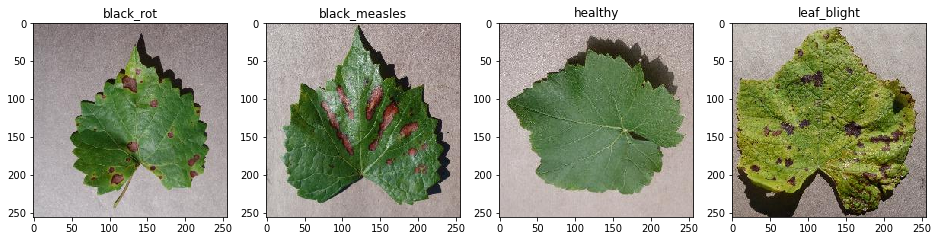

In [3]:
plt.figure(figsize=(16,4))
for i, path in enumerate(images_paths):
    img = cv2.imread(path)
    plt.subplot(1,4,i+1)
    plt.imshow(img[:,:,::-1])
    plt.title(os.path.split(path)[-1][:-4])

plt.show()

# class distribution

The `black_measles` class has a total of 1920 images in the training set,
the `leaf_blight` class has 1722, `black_rot` has 1888, and finally, the `healthy`
class has 1692 images.

In [8]:
from helpers import DataExplorator

data_explorator = DataExplorator()

In [9]:
classes_infos = data_explorator.get_classes_infos()
classes_infos

[{'class': 'black_measles',
  'train_path': 'grape-dataset/train/black_measles',
  'valid_path': 'grape-dataset/valid/black_measles',
  'train_size': 1920,
  'valid_size': 480},
 {'class': 'black_rot',
  'train_path': 'grape-dataset/train/black_rot',
  'valid_path': 'grape-dataset/valid/black_rot',
  'train_size': 1888,
  'valid_size': 472},
 {'class': 'healthy',
  'train_path': 'grape-dataset/train/healthy',
  'valid_path': 'grape-dataset/valid/healthy',
  'train_size': 1692,
  'valid_size': 423},
 {'class': 'leaf_blight',
  'train_path': 'grape-dataset/train/leaf_blight',
  'valid_path': 'grape-dataset/valid/leaf_blight',
  'train_size': 1722,
  'valid_size': 430}]

In [10]:
data_explorator.get_images_classes()

,image,class
0,486b134e-58a8-416f-a453-1fc764ddd38c___FAM_B.M...,black_measles
1,45d3e97e-8d51-4813-8b10-6eb8ccb58865___FAM_B.M...,black_measles
2,c495c21c-1ce4-4da9-a737-56d2f30d4ab0___FAM_B.M...,black_measles
3,3b59178b-44f9-4f9d-8a8b-f40af75021ee___FAM_B.M...,black_measles
4,25a3f640-8f7b-4bd9-9604-e75406c0ec1a___FAM_B.M...,black_measles
...,...,...
7217,e3e40cca-5e8f-4815-9cfa-b15acf369da8___FAM_L.B...,leaf_blight
7218,5d672d08-811f-4d58-a39e-8a49e17c921b___FAM_L.B...,leaf_blight
7219,5e8f63c0-aa67-4d3d-86d6-41343405abf5___FAM_L.B...,leaf_blight
7220,556574c6-b0e1-46ca-acc9-4af99ef1eb87___FAM_L.B...,leaf_blight


The base contains a total of 7222 vine leaf images
for training and 1805 for validation

In [9]:
valid_size = 0
train_size = 0
for info in classes_infos:
    valid_size += info["valid_size"]
    train_size += info["train_size"]
    
dataset_size = train_size + valid_size
print(dataset_size, train_size, valid_size)

9027 7222 1805


distribution of classes in train dataset

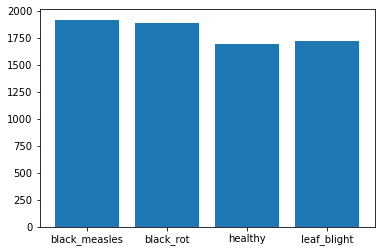

In [11]:
plt.bar([info["class"] for info in classes_infos], [info["train_size"] for info in classes_infos])
plt.show()

# channel exploration
channel exploration in RGB and HSV color systems

The background of the images must be extracted so that
subsequent analyzes can be applied only to the region of the image that contains the sheet. It is desirable to obtain a filter to be used later in conjunction with the resource extraction methods, for that purpose, the RGB and HSV color channels of the image will be explored

In [3]:
from helpers import ImagePloter

ploter = ImagePloter()

RGB channels of sample images

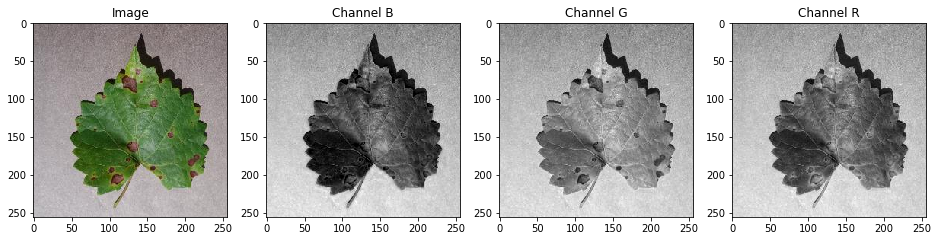

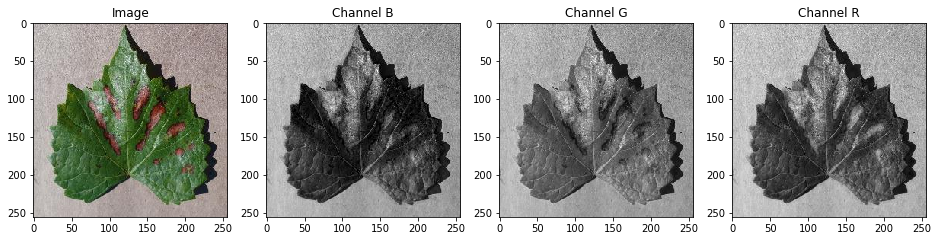

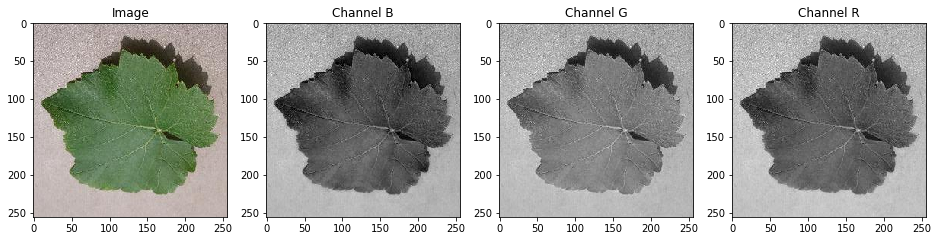

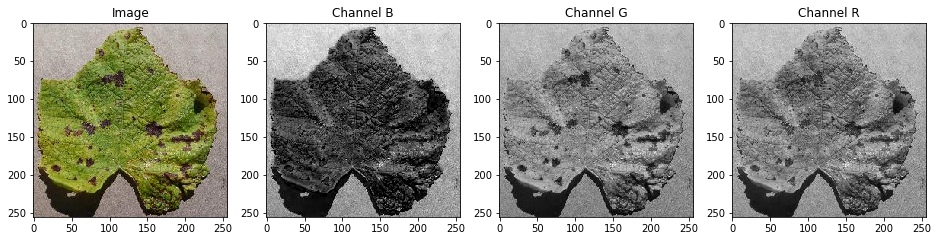

In [5]:
for image in images_paths:
    ploter.plot_rgb(image)

HSV channels of sample images

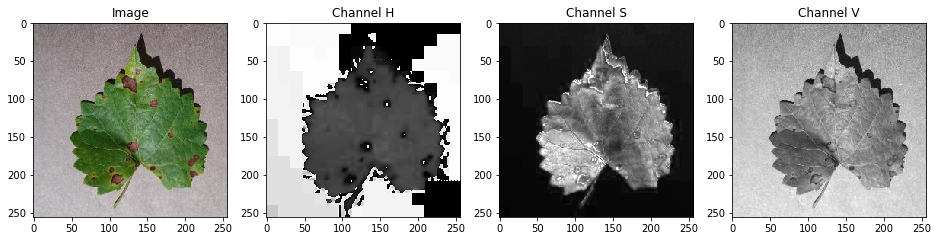

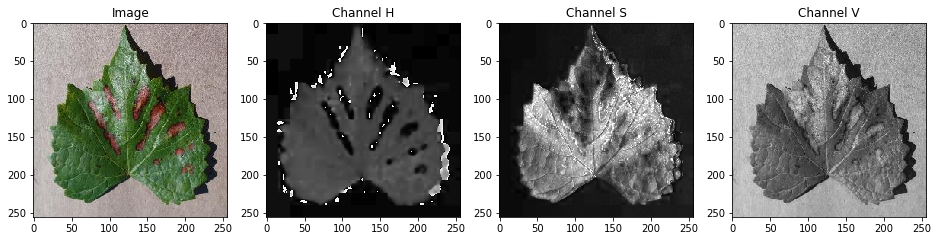

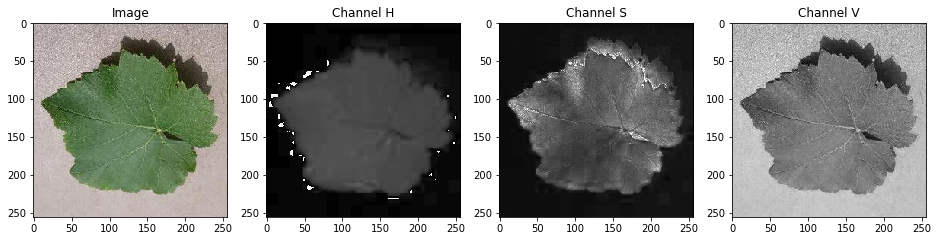

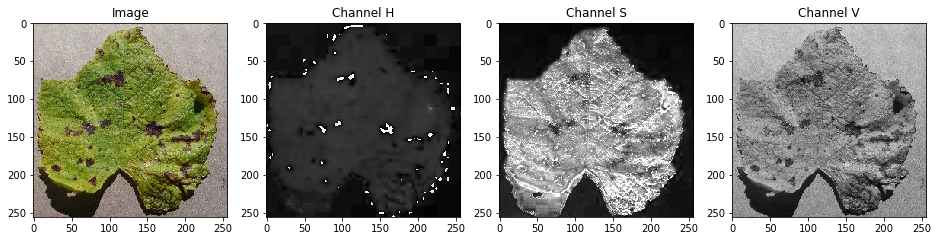

In [6]:
for image in images_paths:
    ploter.plot_hsv(image)

# histogram

It is important to use descriptors capable of identifying representative characteristics in the image, in a way that facilitates the work of the classifying algorithms. The histogram will be used to extract the features from the images. The histogram is a count of the number of pixels in an image channel that has a certain intensity.
The pixel intensity ranges from 0 to 255 and the number of pixels must be normalized

The histogram of the sample images is shown below

In [3]:
from helpers import histogram

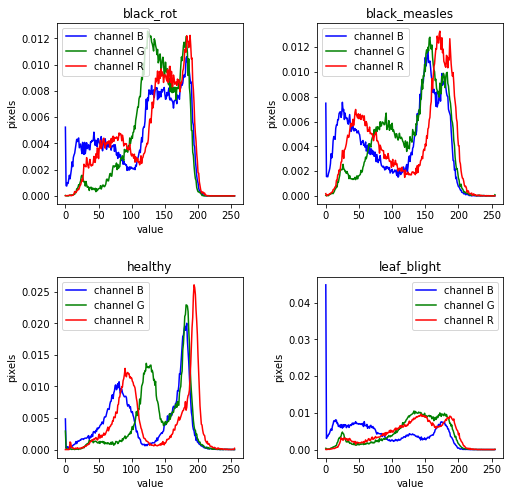

In [6]:
titles = ['black_rot', 'black_measles', 'healthy', 'leaf_blight']

plt.figure(figsize = (8,8))
for i in range(len(images_paths)):
    img = cv2.imread(images_paths[i])
    plt.subplot(2,2,i+1)
    plt.title(titles[i])
    hist = histogram(img)
    plt.plot(hist[0], color='blue')
    plt.plot(hist[1], color='green')
    plt.plot(hist[2], color='red')
    plt.legend(['channel B', 'channel G', 'channel R'])
    plt.xlabel('value')
    plt.ylabel('pixels')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()